# Basic Image Classification with TensorFlow

### Import TensorFlow

In [2]:
import tensorflow as tf

### The Dataset

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

### Shapes of Imported Arrays

In [4]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


### Image Example

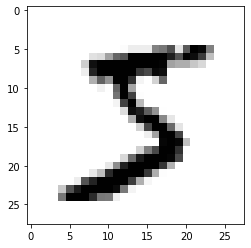

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0],cmap = 'binary')
plt.show()

### Display Labels

In [6]:
print (y_train.shape)
print (x_train.shape)

(60000,)
(60000, 28, 28)


# One Hot Encoding

In [7]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [9]:
print (y_train_encoded.shape)
print (y_test_encoded.shape)
y_test_encoded

(60000, 10)
(10000, 10)


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Neural Networks

# Preprocessing the Examples

In [10]:
import numpy as np
x_train_reshaped = np.reshape(x_train , (60000,784))
x_test_reshaped = np.reshape(x_test , (10000,784))
print(x_train_reshaped.shape)

(60000, 784)


### Data Normalization

In [11]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean)/(x_std - epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std - epsilon)

In [12]:
print(set(x_train_norm[0]))

{-0.3858901621558113, 1.3069219669865781, 1.179642859532263, 1.8033104860584066, 1.6887592893495231, 2.8215433456929264, 2.7197200597294744, 1.1923707702776947, 2.7960875242020635, 2.4397060233299817, 2.0578687009670364, 2.605168863020591, 2.6433525952568857, 2.783359613456632, 2.2869710943848034, 1.2941940562411465, 0.1614099998977432, 0.9378125553690646, -0.22042732246520177, 2.630624684511454, 2.2106036299122147, 2.4906176663117074, 1.994229147239879, -0.10587612575631829, 2.7706317027112006, 2.1342361654396256, 2.274243183639372, -0.4240738943921058, 0.3905123933155102, 0.2759611966066267, 1.561480181895208, -0.04223657202916079, 1.3451056992228725, -0.0931482150108868, 0.1232262676614487, 1.485112717422619, 2.757903791965769, 1.765126753822112, 0.0723146246797227, -0.28406687619235926, 1.9051337720218586, 1.2687382347502836, 2.1851478084213514, 2.68153632749318, -0.1949715009743388, -0.4113459836466743, 0.2886891073520582, 0.021402981697996704, 0.5687031437515512, 0.61961478673327

# Task 6: Creating a Model
### Creating the Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

### Compiling the Model

In [14]:
model.compile(
    optimizer = 'sgd',
    loss= 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [15]:
model.fit(x_train_norm,y_train_encoded, epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3755 - accuracy: 0.8899
Epoch 2/3
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1857 - accuracy: 0.9457
Epoch 3/3
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1403 - accuracy: 0.9593


### Evaluating the Model

In [16]:
loss,accuracy = model.evaluate(x_test_norm,y_test_encoded)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.1336 - accuracy: 0.9590


# Predictions

In [17]:
preds = model.predict(x_test_norm)
print(preds.shape)

(10000, 10)


### Plotting the Results

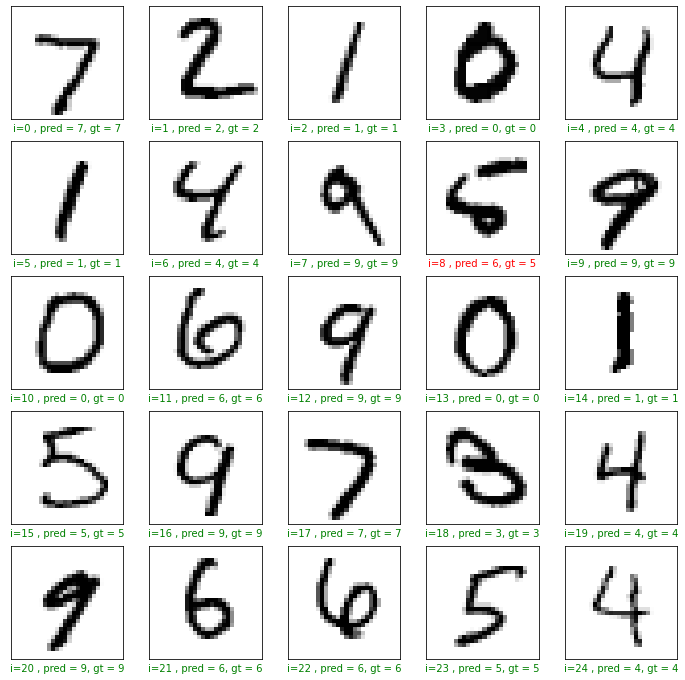

In [18]:
plt.figure(figsize=(12,12))
start_index = 0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]
    
    col = 'g'
    if pred!=gt:
        col = 'r'
        
    plt.xlabel('i={} , pred = {}, gt = {}'.format(start_index+i,pred,gt),color = col)
    plt.imshow(x_test[start_index+i],cmap = 'binary')
plt.show()

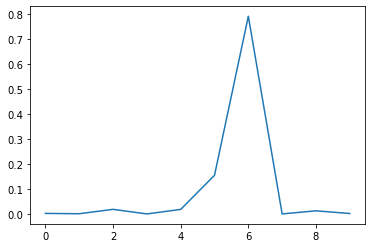

In [19]:
plt.plot(preds[8])
plt.show()